
Centers of clusters:
 [[2.95568966 1.95775862]
 [7.20690909 2.20836364]
 [2.17603774 8.03283019]
 [5.97960784 8.39078431]
 [4.99466667 4.65844444]]

Number of clusters in input data = 5


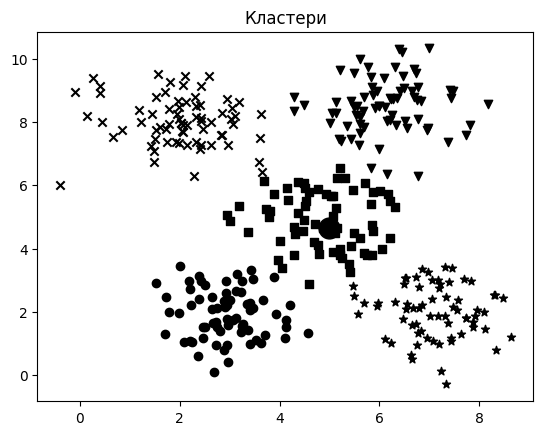

In [23]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import MeanShift, estimate_bandwidth
from itertools import cycle

# Завантажимо вхідні дані.
# Завантаження
X = np.loadtxt('data_clustering.txt', delimiter=',')
# Оцінка ширини вікна для X
bandwidth_X = estimate_bandwidth(X, quantile=0.1, n_samples=len(X))

# Навчимо модель кластеризації на основі зсуву середнього, використовуючи отриману оцінку ширини вікна.
meanshift_model = MeanShift(bandwidth=bandwidth_X, bin_seeding=True)
meanshift_model.fit(X)

# Витягуємо центри всіх кластерів.
cluster_centers = meanshift_model.cluster_centers_
print('\nCenters of clusters:\n', cluster_centers)

# Витягуємо кількість кластерів.
labels = meanshift_model.labels_
num_clusters = len(np.unique(labels))
print("\nNumber of clusters in input data =", num_clusters)
plt.figure()
markers = 'o*xvs'
for i, marker in zip(range(num_clusters), markers):
    # Відображення на графіку точок, приналежащих
    # поточному кластеру
    plt.scatter(X[labels==i, 0], X[labels==i, 1], marker=marker, color='black')

# Відображення на графіку центру кластера
cluster_center = cluster_centers[i]
plt.plot(cluster_center[0], cluster_center[1], marker='o',
         markerfacecolor='black', markeredgecolor='black',
         markersize=15)

plt.title('Кластери')
plt.show()
